In [ ]:
from model import *
from data import *


Using TensorFlow backend.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#cette fonction permet la génération de l'ensemble d'apprentissage 
def geneTrainNpy1(image_path,mask_path,flag_multi_class = False,num_class = 2,image_prefix = "",mask_prefix = "",image_as_gray = True,mask_as_gray = True):
    image_name_arr = glob.glob(os.path.join(image_path,"%s*.png"%image_prefix))
    #print("image_name_arr",image_name_arr)
    
    
    image_arr = []
    mask_arr = []
    i=0
    for index,item in enumerate(image_name_arr):
        
        img = io.imread(item,as_gray = image_as_gray)
        img = np.reshape(img,img.shape + (1,)) if image_as_gray else img
        
        mask = io.imread(item.replace(image_path,mask_path).replace(image_prefix,mask_prefix),as_gray = mask_as_gray)
        
        mask = np.reshape(mask,mask.shape + (1,)) if mask_as_gray else mask
        
        #img,mask = adjustData(img,mask,flag_multi_class,num_class)
        image_arr.append(img)
        mask_arr.append(mask)
        
    image_arr = np.array(image_arr)
    mask_arr = np.array(mask_arr)
    return image_arr,mask_arr
#transformer l'image en noir et blanc
def preprosessing(original_image):
    image_gray=original_image
    binary_image = cv2.threshold(image_gray,1,255, cv2.THRESH_BINARY)
    return binary_image


In [ ]:
image_arr,mask_arr = geneTrainNpy1("labels/train/d","labels/train/l")


In [ ]:
# normalisation de l'image
image_arr1=image_arr[:,0:256,0:256]/255
mask_arr1=mask_arr[:,0:256,0:256]

In [ ]:
#apprentissage du modèle u-net
model = unet()
model_checkpoint = ModelCheckpoint('model_best_weights.h5', monitor='loss',verbose=1, save_best_only=True)

history=model.fit(image_arr1, mask_arr1, batch_size=2, nb_epoch=10, verbose=1,validation_split=0.3, shuffle=False, callbacks=[model_checkpoint])

C:\Users\selsabil\Desktop\Projet Long\code_test_nicolas\model.py:56: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`
  model = Model(input = inputs, output = conv10)
C:\Users\selsabil\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  after removing the cwd from sys.path.


Train on 7 samples, validate on 4 samples
Epoch 1/10
7/7 [==============================] - 39s 6s/step - loss: 0.8083 - accuracy: 0.6097 - val_loss: 0.6863 - val_accuracy: 0.5623

Epoch 00001: loss improved from inf to 0.80832, saving model to model_best_weights.h5
Epoch 2/10
7/7 [==============================] - 38s 5s/step - loss: 0.6959 - accuracy: 0.5472 - val_loss: 0.6804 - val_accuracy: 0.5567

Epoch 00002: loss improved from 0.80832 to 0.69587, saving model to model_best_weights.h5
Epoch 3/10
7/7 [==============================] - 37s 5s/step - loss: 0.6876 - accuracy: 0.5479 - val_loss: 0.6729 - val_accuracy: 0.5564

Epoch 00003: loss improved from 0.69587 to 0.68756, saving model to model_best_weights.h5
Epoch 4/10
7/7 [==============================] - 37s 5s/step - loss: 0.6808 - accuracy: 0.5476 - val_loss: 0.6850 - val_accuracy: 0.5573

Epoch 00004: loss improved from 0.68756 to 0.68084, saving model to model_best_weights.h5
Epoch 5/10
7/7 [==============================

In [ ]:
mask_arr1[0].shape

(512, 512, 1)

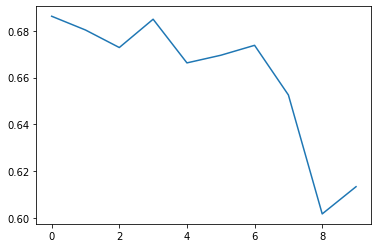

In [ ]:
#affichage des courbes d'apprentissage et de validation 
#il suffit de changer le paramètres 'loss' par 'accuracy' ou 'val_accuracy' ou 'val_loss' 
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel("itérations")
plt.ylabel("loss")
plt.show()

In [ ]:
# effectuer le test du modèle et sauvegarder les résultats de test dans un dossier
results = model.predict(image_arr1[0:1],2,verbose=1)
saveResult("labels/test",results*255)

1/1 [==============================] - 1s 656ms/step


Lossy conversion from float32 to uint8. Range [100.8612060546875, 129.7788848876953]. Convert image to uint8 prior to saving to suppress this warning.


In [ ]:
import cv2

import numpy as np


In [ ]:
'''
original_image = cv2.imread('/labels/test/'+str(0)+'_predict.png')
binary_image = preprosessing(original_image)
cv2.imwrite('./labels/test/fff.png', image_arr1[0]*255)
'''
    


True

# Générer les images pour effectuer la comparaison entre UNET et le modèle de nicolas


In [ ]:
my_im = cv2.imread('./labels/nic_im/200epochs/1_predict.png')
my_im= my_im [0:1024,0:1024]
nic_im=cv2.imread('./labels/nic_im/test/4_predict.png')
nic_im= nic_im [0:1024,0:1024]
or_im=cv2.imread('./labels/nic_im/test/im_orig/1_predict.png')
or_im= or_im [0:1024,0:1024]

In [ ]:
nic_im.shape

(1024, 1024, 3)

In [ ]:
# pour faire superposer l'image de UNET sur l'originale
new=my_im
new[:,:,0]=my_im[:,:,0]
new[:,:,1]=or_im[:,:,1]
new[:,:,2]=0

# ou pour faire superposer l'image de nicolas sur l'originale
'''
new=my_im
new[:,:,0]=nic_im[:,:,0]
new[:,:,1]=or_im[:,:,1]
new[:,:,2]=0
'''

In [ ]:
cv2.imwrite('./labels/comp50/corig/m_o.png', new)

In [ ]:
image_test,image_test_= geneTrainNpy1("labels/nic_im/","labels/nic_im/")

image_testt=image_test_[:,0:1024,0:1024]

In [ ]:
saveResult('./labels/nic_im/test/', image_testt)